# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [4]:
movies = pd.read_csv('titles.csv')

In [5]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [7]:
cast = pd.read_csv('cast.csv.zip')

In [8]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [10]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)

In [11]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [12]:
len(movies)

244914

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [18]:
# Get all Harry Potter Movies
hp_df = movies[movies.title.str.contains('Harry Potter', case=False)]

# sort in descending order
hp_df.sort_values(by=['year'], ascending=False,inplace=True)

# Show results
print(hp_df)

                                               title  year
143147  Harry Potter and the Deathly Hallows: Part 2  2011
152831  Harry Potter and the Deathly Hallows: Part 1  2010
109213        Harry Potter and the Half-Blood Prince  2009
50581      Harry Potter and the Order of the Phoenix  2007
187926           Harry Potter and the Goblet of Fire  2005
61957       Harry Potter and the Prisoner of Azkaban  2004
82791        Harry Potter and the Chamber of Secrets  2002
223087         Harry Potter and the Sorcerer's Stone  2001


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### How many movies were made in the year 2017?

In [19]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [20]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [51]:
len(movies[(movies.year >= 2000) & (movies.year < 2018)])

106029

### Section I - Q4: How many movies are titled "Hamlet"?

In [29]:
len(movies[movies.title=='Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [50]:
hamlet_df = movies[(movies.title=='Hamlet') & (movies.year>=2000)]
hamlet_df.sort_values(by=['year'], ascending=True,inplace=True)
hamlet_df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [37]:
# Movie name Inception and has a NaN value in the n column
len(cast[(cast.title=='Inception') & (cast.n.notna()==False)])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [38]:
# Movie name Inception and doens't have a NaN value in the n column
len(cast[(cast.title=='Inception') & (cast.n.notna())])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [146]:
# Get all main actors
acts = cast[(cast.title=='Inception') & (cast.n.notna())]

# Sort by n
acts.sort_values(by=['n'], ascending=True,inplace=True)

# Show top 10
acts.name[:10]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


590576        Leonardo DiCaprio
859993     Joseph Gordon-Levitt
3387147              Ellen Page
940923                Tom Hardy
2406531            Ken Watanabe
1876301              Dileep Rao
1615709          Cillian Murphy
183937             Tom Berenger
2765969        Marion Cotillard
1826027      Pete Postlethwaite
Name: name, dtype: object

### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [40]:
# A
albus = cast[(cast.character=='Albus Dumbledore')]
print(albus.title)

704984                                    Epic Movie
792421           Harry Potter and the Goblet of Fire
792423     Harry Potter and the Order of the Phoenix
792424      Harry Potter and the Prisoner of Azkaban
947789       Harry Potter and the Chamber of Secrets
947790         Harry Potter and the Sorcerer's Stone
1685537                        Ultimate Hero Project
2248085                                       Potter
Name: title, dtype: object


In [43]:
# B

# set deduplicates any values
print(set(albus.name))

{'Timothy Tedmanson', 'Richard Harris', "George (X) O'Connor", 'Michael Gambon', 'Dane Farwell'}


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [45]:
# A
len(cast[(cast.name=='Keanu Reeves')])

62

In [149]:
# B

# name is Keanu Reeves, has a value for n, and after/on the year 1999
leads = cast[(cast.name=='Keanu Reeves') & (cast.n.notna()) & (cast.year>=1999)]

# Order by year
leads.sort_values(by=['year'], ascending=True,inplace=True)

#show results
leads

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [48]:
len(cast[(cast.year>=1950) & (cast.year<=1960)])

234635

In [52]:
len(cast[(cast.year>=2007) & (cast.year<=2017)])

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [53]:
# A

# lead role is n value of 1
len(cast[(cast.n ==1) & (cast.year>=2000)])

60568

In [55]:
# B

# non-lead, but not supporting is any n value greater than 1
len(cast[(cast.n >1) & (cast.year>=2000)])

1001710

In [56]:
# C

# support is no n value
len(cast[((cast.n.notna()==False)) & (cast.year>=2000)])

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [57]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Honeymoon               11
The Three Musketeers    11
Freedom                 11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

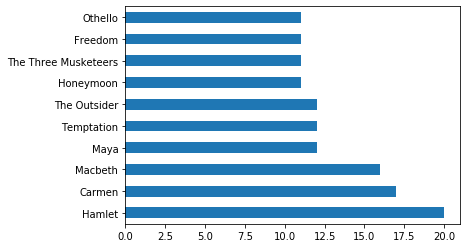

In [58]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [62]:
top_3 = movies[(movies.year>=2000) & (movies.year<=2010)].year.value_counts()[:3]
top_3

2010    6415
2009    6125
2008    5151
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [74]:
len(movies)

244914

In [152]:
(1890//2)*10

9450

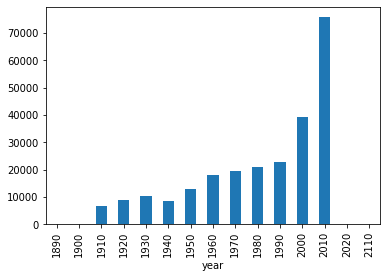

In [108]:
# groupby 
decade = movies.groupby((movies.year//10)*10).count()['year']
decade.plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [84]:
top_common = cast.character.value_counts()[:10]
top_common

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [85]:
top_herself = cast[cast.character=="Herself"].name.value_counts()[:10]
top_herself

Queen Elizabeth II           12
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Joyce Brothers                9
Margaret Thatcher             8
Hillary Clinton               8
Mar?a Isabel (III) Mart?n     6
Sumie Sakai                   6
Oprah Winfrey                 6
In?s J. Southern              6
Name: name, dtype: int64

In [86]:
top_himself = cast[cast.character=="Himself"].name.value_counts()[:10]
top_himself

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [88]:
top_zombie = cast[cast.character.str.startswith("Zombie")].character.value_counts()[:10]
top_zombie

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [89]:
top_police = cast[cast.character.str.startswith("Police")].character.value_counts()[:10]
top_police

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

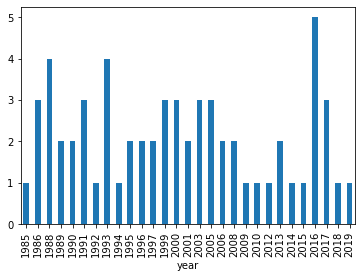

In [91]:
keanu = cast[cast.name=="Keanu Reeves"].groupby(cast.year).count()['year']
keanu.plot(kind='bar')

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


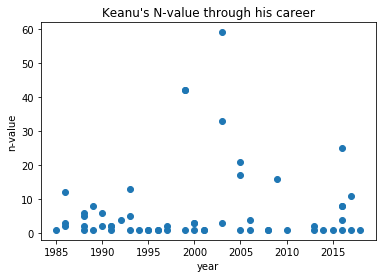

In [119]:
keanu_cast = cast[(cast.name=="Keanu Reeves") & (cast.n.notna())][['year','n']]
keanu_cast
plt.scatter(keanu_cast.year,keanu_cast.n)
plt.xlabel("year")
plt.ylabel("n-value")
plt.title("Keanu's N-value through his career")
plt.show()

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

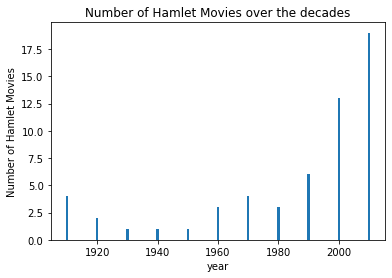

In [129]:
ham_df = movies[movies.title.str.contains('Hamlet', case=False)]

ham_decade = ham_df.groupby((ham_df.year//10)*10).count()
plt.bar(ham_decade.index,ham_decade.year)
plt.xlabel("year")
plt.ylabel("Number of Hamlet Movies")
plt.title("Number of Hamlet Movies over the decades")
plt.show()

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [130]:
# A
len(cast[(cast.n ==1) & (cast.year>=1960) & (cast.year<=1969)])

11823

In [131]:
# B
len(cast[(cast.n ==1) & (cast.year>=2000) & (cast.year<=2009)])

26344

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [140]:
# get all movies played by Frank Oz
oz_cast = cast[(cast.name=="Frank Oz")]

# groupby title count
oz_cast["roles"] = oz_cast.groupby("title").year.transform("count")

# take only titles where role is greater than 1
oz_movies = oz_cast[oz_cast.roles >1][["title","year","roles"]]

# deduplicate and sort
oz_movies.drop_duplicates(inplace=True)
oz_movies.sort_values(by=['year'], ascending=True,inplace=True)

# show results
oz_movies

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,title,year,roles
1723645,The Muppet Movie,1979,8
1723598,An American Werewolf in London,1981,2
1723632,The Great Muppet Caper,1981,6
1723629,The Dark Crystal,1982,2
1723653,The Muppets Take Manhattan,1984,7
1723601,Follow That Bird,1985,3
1723638,The Muppet Christmas Carol,1992,7
1723608,Muppet Treasure Island,1996,4
1723612,Muppets from Space,1999,4
1723625,The Adventures of Elmo in Grouchland,1999,3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [142]:
# get all movies played by Frank Oz
oz_cast = cast[(cast.name=="Frank Oz")]

# groupby character count
oz_cast["character_count"] = oz_cast.groupby("character").year.transform("count")

# take only character where count is greater than 1
oz_movies = oz_cast[oz_cast.character_count >1][["character","character_count"]]

# deduplicate and sort
oz_movies.drop_duplicates(inplace=True)
oz_movies.sort_values(by=['character_count'], ascending=True,inplace=True)

# show results
oz_movies

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,character,character_count
1723603,Grover,2
1723602,Bert,3
1723609,Fozzie Bear,4
1723601,Cookie Monster,5
1723610,Sam the Eagle,5
1723599,Miss Piggy,6
1723611,Animal,6
1723618,Yoda,6


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

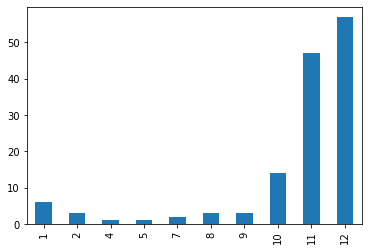

In [109]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

In [153]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


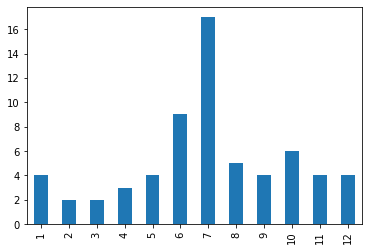

In [155]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

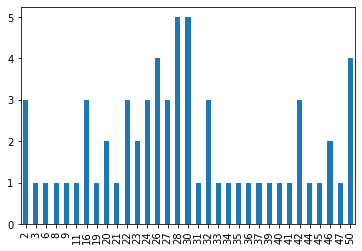

In [156]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
summer.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [160]:
# merge based on year and title
merged = pd.merge(release_dates,cast,on=['title','year'],how="inner")
merged.count()

title        19579697
year         19579697
country      19579697
date         19579697
name         19579697
type         19579697
character    19579697
n            12760473
dtype: int64

In [165]:
keanu_lead = merged[(merged.n==1) & (merged.country == 'USA') & (merged.name=="Keanu Reeves")]
keanu_lead.sort_values(by=['date'],ascending=True,inplace=True)
keanu_lead[["title","date","character"]]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,title,date,character
16617480,The Night Before,1988-04-15,Winston Connelly
1976880,Bill & Ted's Excellent Adventure,1989-02-17,Ted
1976345,Bill & Ted's Bogus Journey,1991-07-19,Ted
8768200,Little Buddha,1994-05-25,Siddhartha
13378143,Speed,1994-06-10,Jack Traven
7569354,Johnny Mnemonic,1995-05-26,Johnny Mnemonic
507600,A Walk in the Clouds,1995-08-11,Paul Sutton
2820055,Chain Reaction,1996-08-02,Eddie Kasalivich
4911071,Feeling Minnesota,1996-09-13,Jjaks Clayton
15111030,The Devil's Advocate,1997-10-17,Kevin Lomax


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

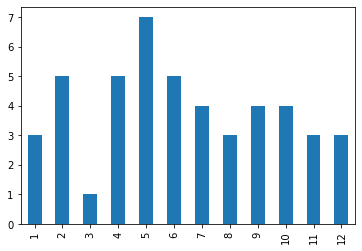

In [166]:
keanu_movies = merged[(merged.country == 'USA') & (merged.name=="Keanu Reeves")]
keanu_movies.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

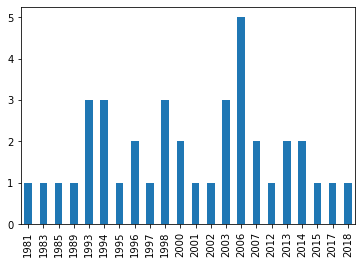

In [167]:
ian_movies = merged[(merged.country == 'USA') & (merged.name=="Ian McKellen")]
ian_movies.date.dt.year.value_counts().sort_index().plot(kind='bar')